In [1029]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
simplefilter(action='ignore', category=DataConversionWarning)

In [1030]:
# use these as the keys to map, add name of coin here so don't need to do it everywhere else
crypto_names = ['Bitcoin', 'Shibainu', 'Saitama', 'XRP', 'Ethereum', 'Litecoin']

#load coin data
c_bitcoin = pd.read_csv('bitcoin-coinmarketcap-year2021-only.csv')
c_shibainu = pd.read_csv('shibainu-coinmarketcap-year2021-only.csv')
c_saitama = pd.read_csv('saitama-coinmarketcap-year2021-only.csv')
c_xrp = pd.read_csv('xrp-coinmarketcap-year2021-only.csv') #this is the Ripple coin
c_ethereum = pd.read_csv('ethereum-coinmarketcap-year2021-only.csv')
c_litecoin = pd.read_csv('litecoin-coinmarketcap-year2021-only.csv')

coin_dict = {crypto_names[0]:c_bitcoin, crypto_names[1]:c_shibainu, crypto_names[2]:c_saitama \
            ,crypto_names[3]:c_xrp,crypto_names[4]:c_ethereum,crypto_names[5]:c_litecoin}


In [1031]:
def print_data_dimensions(coin_name, df):
    display(df.head())
    print("\033[1m" + coin_name + "\033[0m")

In [1032]:
for coin_name in coin_dict:
    print_data_dimensions(coin_name, coin_dict[coin_name])

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,31-Dec-21,47169.37,48472.53,45819.95,46306.45,3.697417e+10,8.759390e+11
1,30-Dec-21,46490.61,47879.97,46060.31,47178.13,2.668649e+10,8.923860e+11
2,29-Dec-21,47623.87,48119.74,46201.49,46444.71,3.004923e+10,8.784790e+11
3,28-Dec-21,50679.86,50679.86,47414.21,47588.85,3.343038e+10,9.000760e+11
4,27-Dec-21,50802.61,51956.33,50499.47,50640.42,2.432435e+10,9.577460e+11


Bitcoin


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,31-Dec-21,0.000034,0.000035,0.000033,0.000033,934738093,18345763036
1,30-Dec-21,0.000034,0.000034,0.000033,0.000034,989363049,18549279007
2,29-Dec-21,0.000035,0.000036,0.000033,0.000034,1210252540,18462658538
3,28-Dec-21,0.000039,0.000039,0.000034,0.000035,1817436004,19186725256
4,27-Dec-21,0.000038,0.000039,0.000038,0.000039,1265319187,21395866527


Shibainu


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,31-Dec-21,4.742000e-08,4.964000e-08,4.710000e-08,4.850000e-08,13962909,0
1,30-Dec-21,4.892000e-08,4.908000e-08,4.539000e-08,4.741000e-08,12751490,0
2,29-Dec-21,4.721000e-08,5.357000e-08,4.667000e-08,4.892000e-08,14126982,0
3,28-Dec-21,5.055000e-08,5.064000e-08,4.552000e-08,4.721000e-08,11122305,0
4,27-Dec-21,5.000000e-08,5.099000e-08,4.868000e-08,5.055000e-08,11947084,0


Saitama


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,31-Dec-21,0.8397,0.8529,0.8058,0.8312,1736939791,39510117215
1,30-Dec-21,0.8179,0.8563,0.8045,0.8396,1880399926,39913519000
2,29-Dec-21,0.8531,0.8650,0.8137,0.8167,2050248751,38823298887
3,28-Dec-21,0.9268,0.9268,0.8487,0.8530,2281985956,40546296042
4,27-Dec-21,0.9208,0.9559,0.9145,0.9262,1788981449,44027073353


XRP


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,31-Jan-22,2603.26,2697.74,2489.07,2688.28,13778234614,3.209600e+11
1,30-Jan-22,2598.56,2631.41,2550.46,2603.47,9501221177,3.107990e+11
2,29-Jan-22,2546.59,2627.61,2526.99,2597.08,11172062661,3.100010e+11
3,28-Jan-22,2421.65,2548.78,2367.83,2547.09,14666227351,3.040000e+11
4,27-Jan-22,2467.19,2510.45,2328.45,2423.00,16126522783,2.891560e+11


Ethereum


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,31-Dec-21,148.21,152.25,144.56,146.51,1051011688,10155516013
1,30-Dec-21,145.59,149.87,143.24,148.29,838034968,10277205859
2,29-Dec-21,145.94,150.61,144.58,145.51,1081715291,10083960341
3,28-Dec-21,155.98,155.98,145.18,145.89,1315031071,10108832346
4,27-Dec-21,155.89,161.08,154.73,155.88,1057977478,10800278867


Litecoin


In [1033]:
#check coin data for null values
def check_coin_data_for_null(coin_name, df):
    print("\033[1m" + coin_name + "\033[0m NaN", np.any(df.isna()))
    display(df.info())

In [1034]:
for coin_name in coin_dict:
    check_coin_data_for_null(coin_name, coin_dict[coin_name])

Bitcoin NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        316 non-null    object 
 1   Open*       316 non-null    float64
 2   High        316 non-null    float64
 3   Low         316 non-null    float64
 4   Close**     316 non-null    float64
 5   Volume      316 non-null    float64
 6   Market Cap  316 non-null    float64
dtypes: float64(6), object(1)
memory usage: 17.4+ KB


None

Shibainu NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        316 non-null    object 
 1   Open*       316 non-null    float64
 2   High        316 non-null    float64
 3   Low         316 non-null    float64
 4   Close**     316 non-null    float64
 5   Volume      316 non-null    int64  
 6   Market Cap  316 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 17.4+ KB


None

Saitama NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        197 non-null    object 
 1   Open*       197 non-null    float64
 2   High        197 non-null    float64
 3   Low         197 non-null    float64
 4   Close**     197 non-null    float64
 5   Volume      197 non-null    int64  
 6   Market Cap  197 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 10.9+ KB


None

XRP NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        316 non-null    object 
 1   Open*       316 non-null    float64
 2   High        316 non-null    float64
 3   Low         316 non-null    float64
 4   Close**     316 non-null    float64
 5   Volume      316 non-null    int64  
 6   Market Cap  316 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 17.4+ KB


None

Ethereum NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        347 non-null    object 
 1   Open*       347 non-null    float64
 2   High        347 non-null    float64
 3   Low         347 non-null    float64
 4   Close**     347 non-null    float64
 5   Volume      347 non-null    int64  
 6   Market Cap  347 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 19.1+ KB


None

Litecoin NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        316 non-null    object 
 1   Open*       316 non-null    float64
 2   High        316 non-null    float64
 3   Low         316 non-null    float64
 4   Close**     316 non-null    float64
 5   Volume      316 non-null    int64  
 6   Market Cap  316 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 17.4+ KB


None

In [1035]:
#split the data into features and target per coin
Xs_raw_data = dict.fromkeys(crypto_names, [])
Ts_raw_data = dict.fromkeys(crypto_names, [])

for coin_name in coin_dict:
    coin_raw_data = coin_dict[coin_name]
    first_cols = coin_raw_data.iloc[:, 0:4].copy()
    last_cols = coin_raw_data.iloc[:, 5:].copy()
    first_cols.reset_index(drop=True, inplace=True)
    last_cols.reset_index(drop=True, inplace=True)
    
    features = [first_cols, last_cols]
    Xs_raw_data[coin_name] = pd.concat(features, axis=1) #training data of this coin
    
    close_col = coin_raw_data.iloc[:, 4].copy()
    date_col = coin_raw_data.iloc[:, 0].copy()
    
    target_close = [date_col, close_col]
    Ts_raw_data[coin_name] = pd.concat(target_close, axis=1) #target data of this coin
    
#display(Xs_raw_data)
#display(Ts_raw_data)

In [1036]:
#original Date format code is from renukadevird @ https://www.kaggle.com/renukadevird/crypto-corr
#modified to fit my data structure
#reformat Date column
for coin_name in crypto_names:
    date_data = Xs_raw_data[coin_name]['Date']
    Xs_raw_data[coin_name]['Date'] = pd.to_datetime(date_data, format='%d-%b-%y').dt.date #remove time
    
    date_data = Ts_raw_data[coin_name]['Date']
    Ts_raw_data[coin_name]['Date'] = pd.to_datetime(date_data, format='%d-%b-%y').dt.date #remove time
    
#display(Xs_raw_data)
#display(Ts_raw_data)

In [1037]:
#drop unnecessary features
for coin_name in crypto_names:
    print(coin_name)
    Xs_raw_data[coin_name].drop(['Market Cap'], axis = 1, inplace = True) #drop features not mentioned in articles
    #Xs_raw_data[coin_name].drop(['Open*','High','Low'], axis = 1, inplace = True)
    
display(Xs_raw_data['Bitcoin'])

Bitcoin
Shibainu
Saitama
XRP
Ethereum
Litecoin


,Date,Open*,High,Low,Volume
0,2021-12-31,47169.37,48472.53,45819.95,3.697417e+10
1,2021-12-30,46490.61,47879.97,46060.31,2.668649e+10
2,2021-12-29,47623.87,48119.74,46201.49,3.004923e+10
3,2021-12-28,50679.86,50679.86,47414.21,3.343038e+10
4,2021-12-27,50802.61,51956.33,50499.47,2.432435e+10
...,...,...,...,...,...
311,2021-02-23,54204.93,54204.93,45290.59,1.061020e+11
312,2021-02-22,57532.74,57533.39,48967.57,9.205242e+10
313,2021-02-21,56068.57,58330.57,55672.61,5.189759e+10
314,2021-02-20,55887.34,57505.23,54626.56,6.814546e+10


In [1038]:
#original Date format code is from renukadevird @ https://www.kaggle.com/renukadevird/crypto-corr
#modified to fit my data structure
# use Date as the row index instead of the default row numbers
for coin_name in crypto_names:
    coin_data_indexed_by_date = {}
    coin_raw = Xs_raw_data[coin_name]
    coin_data_indexed_by_date = (pd.pivot_table(coin_raw,values=['Open*','High','Low','Volume']
                        ,index=['Date']))
    Xs_raw_data[coin_name]=coin_data_indexed_by_date
    #print('coin_data_indexed_by_date', coin_data_indexed_by_date)
    
    coin_raw = Ts_raw_data[coin_name]
    coin_data_indexed_by_date = (pd.pivot_table(coin_raw,values=['Close**']
                        ,index=['Date']))
    Ts_raw_data[coin_name]=coin_data_indexed_by_date
    

In [1039]:
import pandas as pd
from sklearn import preprocessing

def normalize_data():
    #Normalize the raw data for each coin
    for coin_name in crypto_names:
        Xs_raw_data_for_coin = Xs_raw_data[coin_name] #returns a numpy array
        #print(Xs_raw_data_for_coin)

        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(Xs_raw_data_for_coin)
        Xs_raw_data_for_coin = pd.DataFrame(x_scaled,index=Xs_raw_data_for_coin.index.values
                                            ,columns=Xs_raw_data_for_coin.columns.values)
        #print(Xs_raw_data_for_coin)
        Xs_raw_data[coin_name] = Xs_raw_data_for_coin

        Ts_raw_data_for_coin = Ts_raw_data[coin_name] #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        t_scaled = min_max_scaler.fit_transform(Ts_raw_data_for_coin)
        Ts_raw_data_for_coin = pd.DataFrame(t_scaled,index=Ts_raw_data_for_coin.index.values
                                            ,columns=Ts_raw_data_for_coin.columns.values)
        Ts_raw_data[coin_name] = Ts_raw_data_for_coin

# print(Xs_raw_data)
# print(Ts_raw_data)

In [1040]:
#split the features/target into training and testing data
Xs_train = dict.fromkeys(crypto_names, [])
Xs_test = dict.fromkeys(crypto_names, [])
Ts_train = dict.fromkeys(crypto_names, [])
Ts_test = dict.fromkeys(crypto_names, [])

for coin_name in coin_dict:
    print(coin_name)
    X_train, X_test, t_train, t_test = train_test_split(Xs_raw_data[coin_name] \
                                                        , Ts_raw_data[coin_name] \
                                                        ,test_size=0.2, random_state=1)
    Xs_train[coin_name] = X_train
    Xs_test[coin_name] = X_test
    Ts_train[coin_name] = t_train
    Ts_test[coin_name] = t_test

Bitcoin
Shibainu
Saitama
XRP
Ethereum
Litecoin


In [1041]:
#display(Ts_train)

In [1042]:
Xs_raw_data['Bitcoin']

,High,Low,Open*,Volume
Date,,,,
2021-02-19,56113.65,50937.28,51675.98,6.349550e+10
2021-02-20,57505.23,54626.56,55887.34,6.814546e+10
2021-02-21,58330.57,55672.61,56068.57,5.189759e+10
2021-02-22,57533.39,48967.57,57532.74,9.205242e+10
2021-02-23,54204.93,45290.59,54204.93,1.061020e+11
...,...,...,...,...
2021-12-27,51956.33,50499.47,50802.61,2.432435e+10
2021-12-28,50679.86,47414.21,50679.86,3.343038e+10
2021-12-29,48119.74,46201.49,47623.87,3.004923e+10


In [1043]:
print('Bitcoin')
Xs_train['Bitcoin']

Bitcoin


,High,Low,Open*,Volume
Date,,,,
2021-03-07,51384.37,48918.68,48918.68,4.313746e+10
2021-02-19,56113.65,50937.28,51675.98,6.349550e+10
2021-07-08,33907.91,32133.18,33889.61,2.991040e+10
2021-08-22,49471.61,48199.94,48869.10,2.537098e+10
2021-04-22,55410.23,50583.81,53857.11,7.479863e+10
...,...,...,...,...
2021-09-10,47031.74,44344.49,46396.66,3.915467e+10
2021-11-01,62419.00,59695.18,61320.45,3.615057e+10
2021-05-02,57902.59,56141.91,57825.86,3.817741e+10


In [1044]:
# df = Ts_raw_data['Bitcoin'].copy()
# df = df.to_numpy()
# df

In [1045]:
# features = Xs_raw_data['Bitcoin'].copy().to_numpy()
# target = Ts_raw_data['Bitcoin'].copy().to_numpy()
# np.concatenate((features, target), axis=1)

In [1046]:
train = Xs_train['Bitcoin']
train

,High,Low,Open*,Volume
Date,,,,
2021-03-07,51384.37,48918.68,48918.68,4.313746e+10
2021-02-19,56113.65,50937.28,51675.98,6.349550e+10
2021-07-08,33907.91,32133.18,33889.61,2.991040e+10
2021-08-22,49471.61,48199.94,48869.10,2.537098e+10
2021-04-22,55410.23,50583.81,53857.11,7.479863e+10
...,...,...,...,...
2021-09-10,47031.74,44344.49,46396.66,3.915467e+10
2021-11-01,62419.00,59695.18,61320.45,3.615057e+10
2021-05-02,57902.59,56141.91,57825.86,3.817741e+10


Original code for the following functions are from Jason Brownlee, PhD at https://machinelearningmastery.com/random-forest-for-time-series-forecasting/ 
Some code adapted to fit this project/dataset.

* series_to_supervised(data, n_in=1, n_out=1, dropnan=True)
* walk_forward_validation(data, n_test)
* train_test_split(data, n_test)
* random_forest_forecast(train, testX)

In [1047]:
from numpy import asarray
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX, model):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	#model = RandomForestRegressor(n_estimators=100)
# 	model = Pipeline([('scaler', StandardScaler()),
#                            ('regr', RandomForestRegressor(n_estimators=100))])
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
#n_test is number of rows out of data rows to use for testing
#print_values is a boolean to print/not to print expected vs predicted values (my addition)
def walk_forward_validation(data, n_test, model, print_values=True):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]

		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX, model)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		if print_values:
			print('>expected=%.12f, predicted=%.12f' % (testy, yhat))
		else: # (my addition)
			print('.', end='')

	if print_values == False: # (my addition)
			print() #print newline
        
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	r2 = r2_score(test[:, -1], predictions) #my addition to get r2 score
	return r2, error, test[:, -1], predictions

........................................................................................................................
MAE: 923.953, R2: 0.972


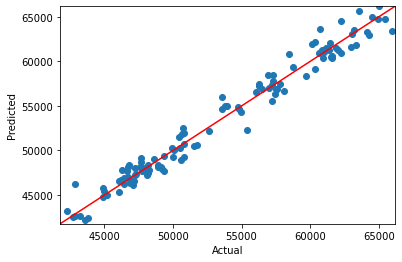

In [1048]:
import numpy as np

#test on Bitcoin only
features = Xs_raw_data['Bitcoin'].copy().to_numpy()
target = Ts_raw_data['Bitcoin'].copy().to_numpy()

# features = Xs_raw_data[coin_name].copy().to_numpy()
# target = Ts_raw_data[coin_name].copy().to_numpy()

values = np.concatenate((features, target), axis=1)
data = series_to_supervised(values, n_in=4) #he had 6, I have 4

# evaluate
model = RandomForestRegressor(n_estimators=100)
r2, mae, y, yhat = walk_forward_validation(data, 120, model, False)
print('MAE: %.3f, R2: %.3f' % (mae, r2))

# plot expected vs predicted
# pyplot.plot(y, 'o', label='Expected')
# pyplot.plot(yhat, 'o', label='Predicted')
# pyplot.legend()

pyplot.scatter(y, yhat)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([np.amin(yhat),np.amax(yhat)], [np.amin(yhat),np.amax(yhat)], 'r-')
plt.xlim([np.amin(yhat), np.amax(yhat)])
plt.ylim([np.amin(yhat), np.amax(yhat)])
pyplot.show()
#print(np.amin(yhat), np.amax(yhat), np.array(yhat).shape, np.where(yhat == np.amin(yhat)))

............................................................
MAE: 0.000, R2: 0.804


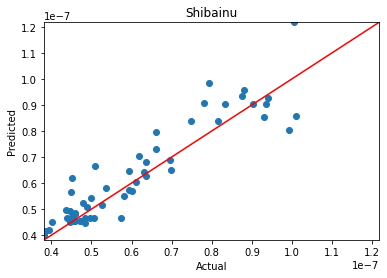

In [1049]:
import numpy as np

#test on Saitama only
features = Xs_raw_data['Saitama'].copy().to_numpy()
target = Ts_raw_data['Saitama'].copy().to_numpy()

# features = Xs_raw_data[coin_name].copy().to_numpy()
# target = Ts_raw_data[coin_name].copy().to_numpy()

values = np.concatenate((features, target), axis=1)
data = series_to_supervised(values, n_in=4) #he had 6, I have 4

# evaluate
#model = Ridge(alpha=0.001)
#LinearRegression()
model = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestRegressor(n_estimators=100))])
r2, mae, y, yhat = walk_forward_validation(data, 60, model, False)
print('MAE: %.3f, R2: %.3f' % (mae, r2))

# plot expected vs predicted
# pyplot.plot(y, 'o', label='Expected')
# pyplot.plot(yhat, 'o', label='Predicted')
# pyplot.legend()

pyplot.scatter(y, yhat)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([np.amin(yhat),np.amax(yhat)], [np.amin(yhat),np.amax(yhat)], 'r-')
plt.xlim([np.amin(yhat), np.amax(yhat)])
plt.ylim([np.amin(yhat), np.amax(yhat)])
plt.title('Shibainu')
pyplot.show()
#print(np.amin(yhat), np.amax(yhat), np.array(yhat).shape, np.where(yhat == np.amin(yhat)))

..........................................................................................
Bitcoin
MAE: 952.200 ,  R2: 0.962


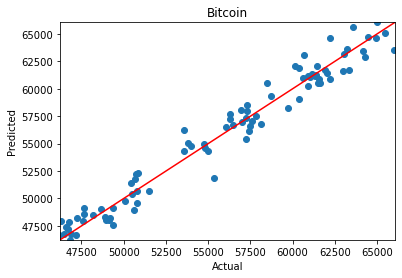

..........................................................................................
Shibainu
MAE: 0.000 ,  R2: 0.814


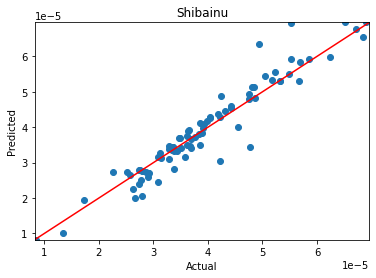

..........................................................................................
Saitama
MAE: 0.000 ,  R2: 0.877


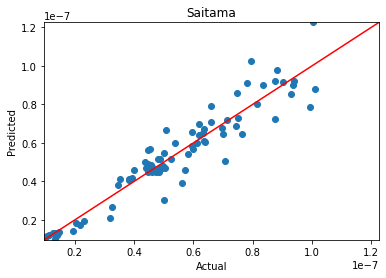

..........................................................................................
XRP
MAE: 0.018 ,  R2: 0.968


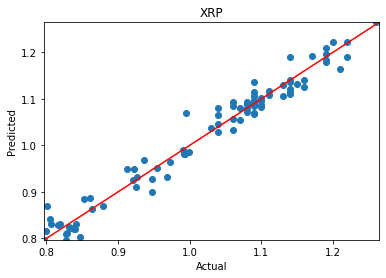

..........................................................................................
Ethereum
MAE: 85.143 ,  R2: 0.969


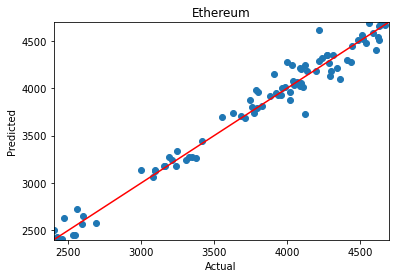

..........................................................................................
Litecoin
MAE: 4.712 ,  R2: 0.956


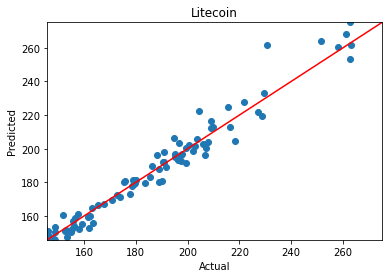

In [974]:
# train and test on all coins
for coin_name in crypto_names:

    features = Xs_raw_data[coin_name].copy().to_numpy()
    target = Ts_raw_data[coin_name].copy().to_numpy()

    values = np.concatenate((features, target), axis=1)
    data = series_to_supervised(values, n_in=4) #he had 6, I have 4

    # evaluate
    model = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestRegressor(n_estimators=100))])
    r2, mae, y, yhat = walk_forward_validation(data, 90, model, False)
    print("\033[1m" + coin_name + "\033[0m")
    print('MAE: %.3f' % mae, ', ', 'R2: %.3f' % r2)
    
    pyplot.scatter(y, yhat)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot([np.amin(yhat),np.amax(yhat)], [np.amin(yhat),np.amax(yhat)], 'r-')
    plt.xlim([np.amin(yhat), np.amax(yhat)])
    plt.ylim([np.amin(yhat), np.amax(yhat)])
    plt.title(coin_name)
    pyplot.show()

In [1050]:
# orginal code flow from Jason Brownlee, PhD
# code adapted to fight dataset
# predict the next day's (day 1) Bitcoin price
def predict_next_day_price(coin_name, prediction_feature_vals):
    features = Xs_raw_data[coin_name].copy().to_numpy()
    target = Ts_raw_data[coin_name].copy().to_numpy()

    values = np.concatenate((features, target), axis=1)

    train = series_to_supervised(values, n_in=4)
    print(train.shape)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # print(trainX.shape, trainy.shape)

    # print(trainX)
    # fit model
    model = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestRegressor(n_estimators=100))])
    #model.fit(trainX, trainy)
    model.fit(features, target)

    # construct an input for a new prediction
    row = prediction_feature_vals
    #print(row)

    # make a one-step prediction
    yhat = model.predict(asarray([row]))
    print('Input: %s, Predicted: %.12f' % (row, yhat[0]))
    
    return yhat[0]

In [1056]:
import datetime

#add the predicted value to dataset
def add_predicted_val_to_coin(coin_name, prediction_features, predicted_val):
    latest_date_index = Xs_raw_data[coin_name].index[len(Xs_raw_data[coin_name])-1]
    next_date_index = latest_date_index + datetime.timedelta(days=1)

    Xs_raw_data[coin_name].loc[next_date_index] = np.array(np.array(prediction_features))
    Ts_raw_data[coin_name].loc[next_date_index] = predicted_val
    df = Xs_raw_data[coin_name].copy()
    df = df.assign(Close = Ts_raw_data[coin_name])
    #display(df)
    #print(pd.concat([Xs_raw_data[coin_name],Ts_raw_data[coin_name]]))

In [1057]:
# function to predict the next n number of future day prices
# the array count of prediction_features determines the number of days
# prediction is a 2D array
def predict_next_days_prices(coin_name, prediction_features, plot_graph=False):
    for day in range(len(prediction_features)):
        predicted_val = predict_next_day_price(coin_name, prediction_features[day])
        print('future', "\033[1m day", (day + 1), "\033[0m", 'predicted price:', predicted_val, "for", coin_name)
        
        f = open("predictedprices" + coin_name + ".txt", "a")
        f.write("future day " + str(day + 1) + " " + str(predicted_val) + " for " + coin_name + "\n")
       

        add_predicted_val_to_coin(coin_name, prediction_features[day], predicted_val)
        
        features = Xs_raw_data[coin_name].copy().to_numpy()
        target = Ts_raw_data[coin_name].copy().to_numpy()

        values = np.concatenate((features, target), axis=1)
        data = series_to_supervised(values, n_in=4) #he had 6, I have 4

        # evaluate
        model = Pipeline([('scaler', StandardScaler()), 
                     ('classifier', RandomForestRegressor(n_estimators=100))])
        r2, mae, y, yhat = walk_forward_validation(data, 90, model, False)
        print("\033[1m" + coin_name + "\033[0m")
        print('MAE: %.3f' % mae, ', ', 'R2: %.3f' % r2)
        f.write('MAE: ' + str(mae) + ', ' + 'R2: ' + str(r2) + '\n')
        f.close()
        
        if plot_graph == True:
            pyplot.scatter(y, yhat)
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.plot([np.amin(yhat),np.amax(yhat)], [np.amin(yhat),np.amax(yhat)], 'r-')
            plt.xlim([np.amin(yhat), np.amax(yhat)])
            plt.ylim([np.amin(yhat), np.amax(yhat)])
            plt.title(coin_name)
            pyplot.show()

In [1058]:
prediction_features=[[40026.02,40418.88,39713.06,13736557863]]
predict_next_days_prices('Bitcoin', prediction_features)

(314, 25)
Input: [40026.02, 40418.88, 39713.06, 13736557863], Predicted: 40535.775810959072
future  day 1  predicted price: 40535.77581095907 for Bitcoin
..........................................................................................
Bitcoin
MAE: 926.865 ,  R2: 0.969


In [1055]:
#predict one day into the future for all coins
bitcoin_features=[[40026.02,40418.88,39713.06,13736557863]]
ethereum_features=[[2784.87,2826.35,2707.38,977418316]]
xrp_features=[[0.7859,0.8498,0.7736,3325442943]]
litecoin_features=[[115.71,115.71,109.15,736479992]]
shibainu_features=[[0.00002751,0.00002754,0.00002502,1235841144]]
saitama_features=[[0.00000001777,0.0000000179,0.00000001658,5723245]]

for coin_name in crypto_names:
    prediction_features = bitcoin_features
    
    if coin_name == 'Ethereum':
        prediction_features = ethereum_features
    elif coin_name == 'XRP':
        prediction_features = xrp_features
    elif coin_name == 'Litecoin':
        prediction_features = litecoin_features
    elif coin_name == 'Shibainu':
        prediction_features = shibainu_features
    elif coin_name == 'Saitama':
        prediction_features = saitama_features
    
    predict_next_days_prices(coin_name, prediction_features)

(313, 25)
Input: [40026.02, 40418.88, 39713.06, 13736557863], Predicted: 40556.937418000074
future  day 1  predicted price: 40556.937418000074 for Bitcoin


,High,Low,Open*,Volume,Close
Date,,,,,
2021-02-19,56113.65,50937.28,51675.98,6.349550e+10,55888.130000
2021-02-20,57505.23,54626.56,55887.34,6.814546e+10,56099.520000
2021-02-21,58330.57,55672.61,56068.57,5.189759e+10,57539.940000
2021-02-22,57533.39,48967.57,57532.74,9.205242e+10,54207.320000
2021-02-23,54204.93,45290.59,54204.93,1.061020e+11,48824.430000
...,...,...,...,...,...
2021-12-29,48119.74,46201.49,47623.87,3.004923e+10,46444.710000
2021-12-30,47879.97,46060.31,46490.61,2.668649e+10,47178.130000
2021-12-31,48472.53,45819.95,47169.37,3.697417e+10,46306.450000


..........................................................................................
Bitcoin
MAE: 941.930 ,  R2: 0.967
(312, 25)
Input: [2.751e-05, 2.754e-05, 2.502e-05, 1235841144], Predicted: 0.000027242400
future  day 1  predicted price: 2.7242400000000016e-05 for Shibainu


,High,Low,Open*,Volume,Close
Date,,,,,
2021-02-19,1.000000e-08,1.000000e-08,1.000000e-08,1.051100e+05,1.000000e-08
2021-02-20,1.000000e-08,1.000000e-08,1.000000e-08,2.599310e+05,1.000000e-08
2021-02-21,1.000000e-08,1.000000e-08,1.000000e-08,1.246840e+05,1.000000e-08
2021-02-22,1.000000e-08,1.000000e-08,1.000000e-08,1.029940e+05,1.000000e-08
2021-02-23,1.000000e-08,1.000000e-08,1.000000e-08,3.417400e+04,1.000000e-08
...,...,...,...,...,...
2021-12-28,3.906000e-05,3.427000e-05,3.906000e-05,1.817436e+09,3.494000e-05
2021-12-29,3.623000e-05,3.320000e-05,3.495000e-05,1.210253e+09,3.363000e-05
2021-12-30,3.436000e-05,3.297000e-05,3.367000e-05,9.893630e+08,3.378000e-05


..........................................................................................
Shibainu
MAE: 0.000 ,  R2: 0.806
(193, 25)
Input: [1.777e-08, 1.79e-08, 1.658e-08, 5723245], Predicted: 0.000000017538
future  day 1  predicted price: 1.7538e-08 for Saitama


,High,Low,Open*,Volume,Close
Date,,,,,
2021-06-18,7.000000e-11,4.500000e-11,4.700000e-11,427414.0,6.700000e-11
2021-06-19,1.140000e-10,6.500000e-11,6.700000e-11,850651.0,6.500000e-11
2021-06-20,1.040000e-10,6.500000e-11,6.500000e-11,287003.0,9.000000e-11
2021-06-21,9.000000e-11,5.600000e-11,9.000000e-11,519901.0,5.700000e-11
2021-06-22,6.000000e-11,1.800000e-11,5.700000e-11,185659.0,3.700000e-11
...,...,...,...,...,...
2021-12-28,5.064000e-08,4.552000e-08,5.055000e-08,11122305.0,4.721000e-08
2021-12-29,5.357000e-08,4.667000e-08,4.721000e-08,14126982.0,4.892000e-08
2021-12-30,4.908000e-08,4.539000e-08,4.892000e-08,12751490.0,4.741000e-08


..........................................................................................
Saitama
MAE: 0.000 ,  R2: 0.877
(312, 25)
Input: [0.7859, 0.8498, 0.7736, 3325442943], Predicted: 0.766100000000
future  day 1  predicted price: 0.7660999999999996 for XRP


,High,Low,Open*,Volume,Close
Date,,,,,
2021-02-19,0.5791,0.5207,0.5326,6.896487e+09,0.5670
2021-02-20,0.5824,0.4824,0.5669,7.892200e+09,0.5175
2021-02-21,0.5584,0.5085,0.5169,6.569716e+09,0.5486
2021-02-22,0.6399,0.5201,0.5483,1.876924e+10,0.5717
2021-02-23,0.5710,0.3793,0.5710,1.435902e+10,0.4736
...,...,...,...,...,...
2021-12-28,0.9268,0.8487,0.9268,2.281986e+09,0.8530
2021-12-29,0.8650,0.8137,0.8531,2.050249e+09,0.8167
2021-12-30,0.8563,0.8045,0.8179,1.880400e+09,0.8396


..........................................................................................
XRP
MAE: 0.019 ,  R2: 0.967
(343, 25)
Input: [2784.87, 2826.35, 2707.38, 977418316], Predicted: 2834.947400000002
future  day 1  predicted price: 2834.947400000002 for Ethereum


,High,Low,Open*,Volume,Close
Date,,,,,
2021-02-19,1969.55,1896.68,1938.86,2.626881e+10,1960.1600
2021-02-20,2036.29,1830.53,1959.90,3.469609e+10,1919.5300
2021-02-21,1974.26,1890.37,1918.67,2.362655e+10,1935.6000
2021-02-22,1936.45,1580.63,1935.56,4.240965e+10,1781.9900
2021-02-23,1781.41,1378.84,1781.41,5.202986e+10,1570.2000
...,...,...,...,...,...
2022-01-28,2548.78,2367.83,2421.65,1.466623e+10,2547.0900
2022-01-29,2627.61,2526.99,2546.59,1.117206e+10,2597.0800
2022-01-30,2631.41,2550.46,2598.56,9.501221e+09,2603.4700


..........................................................................................
Ethereum
MAE: 85.010 ,  R2: 0.970
(312, 25)
Input: [115.71, 115.71, 109.15, 736479992], Predicted: 115.053500000000
future  day 1  predicted price: 115.0534999999999 for Litecoin


,High,Low,Open*,Volume,Close
Date,,,,,
2021-02-19,241.16,220.96,226.90,7.151083e+09,236.6800
2021-02-20,245.96,216.64,236.65,8.208699e+09,227.6200
2021-02-21,233.15,220.98,227.52,6.934670e+09,227.2300
2021-02-22,227.23,182.53,227.22,9.523044e+09,208.1100
2021-02-23,208.37,159.68,208.12,1.094470e+10,176.9300
...,...,...,...,...,...
2021-12-28,155.98,145.18,155.98,1.315031e+09,145.8900
2021-12-29,150.61,144.58,145.94,1.081715e+09,145.5100
2021-12-30,149.87,143.24,145.59,8.380350e+08,148.2900


..........................................................................................
Litecoin
MAE: 4.791 ,  R2: 0.955


In [1059]:
#online learning - use files with last year's data only for training, then use these files for predictions
c_bitcoin_features = pd.read_csv('bitcoin-coinmarketcap-features-only.csv')
# c_shibainu_features = pd.read_csv('shibainu-coinmarketcap-features-only.csv')
# c_saitama_features = pd.read_csv('saitama-coinmarketcap-features-only.csv')
# c_xrp_features = pd.read_csv('xrp-coinmarketcap-features-only.csv') #this is the Ripple coin
# c_ethereum_features = pd.read_csv('ethereum-coinmarketcap-features-only.csv')
# c_litecoin_features = pd.read_csv('litecoin-coinmarketcap-features-only.csv')

for coin_name in crypto_names:
    prediction_features = c_bitcoin_features.to_numpy()
    
    if coin_name == 'Ethereum':
        prediction_features = c_ethereum_features
    elif coin_name == 'XRP':
        prediction_features = c_xrp_features
    elif coin_name == 'Litecoin':
        prediction_features = c_litecoin_features
    elif coin_name == 'Shibainu':
        prediction_features = c_shibainu_features
    elif coin_name == 'Saitama':
        prediction_features = c_saitama_features
    
    predict_next_days_prices(coin_name, prediction_features)

(315, 25)
Input: [4.05521300e+04 4.09291500e+04 3.96376200e+04 2.33100077e+10], Predicted: 40842.698487784292
future  day 1  predicted price: 40842.69848778429 for Bitcoin
..........................................................................................
Bitcoin
MAE: 916.547 ,  R2: 0.972
(316, 25)
Input: [4.39370700e+04 4.41329700e+04 4.02493700e+04 2.62466628e+10], Predicted: 44629.204743041570
future  day 2  predicted price: 44629.20474304157 for Bitcoin
..........................................................................................
Bitcoin
MAE: 897.957 ,  R2: 0.974
(317, 25)
Input: [4.45782800e+04 4.45782800e+04 4.34566900e+04 1.97925477e+10], Predicted: 44947.619490899575
future  day 3  predicted price: 44947.619490899575 for Bitcoin
..........................................................................................
Bitcoin
MAE: 890.180 ,  R2: 0.974
(318, 25)
Input: [4.25864600e+04 4.46672200e+04 4.24910300e+04 2.27216591e+10], Predicted: 43525.63193089564

..........................................................................................
Bitcoin
MAE: 699.188 ,  R2: 0.988
(342, 25)
Input: [3.64715900e+04 3.66888100e+04 3.43492500e+04 3.97143854e+10], Predicted: 36012.869006896966
future  day 28  predicted price: 36012.869006896966 for Bitcoin
..........................................................................................
Bitcoin
MAE: 699.829 ,  R2: 0.988
(343, 25)
Input: [4.0699610e+04 4.1060530e+04 3.5791430e+04 4.3011992e+10], Predicted: 41157.120408822062
future  day 29  predicted price: 41157.12040882206 for Bitcoin
..........................................................................................
Bitcoin
MAE: 663.601 ,  R2: 0.989
(344, 25)
Input: [4.17440300e+04 4.34130200e+04 4.06728200e+04 2.03820339e+10], Predicted: 43588.947475364243
future  day 30  predicted price: 43588.94747536424 for Bitcoin
..........................................................................................
Bitcoin
MAE: 671.1

KeyError: 0